# Fitting

C:\Users\mi\anaconda3\envs\zfit\lib\site-packages\ipykernel_launcher.py:2: UserWarning: zfit has moved from TensorFlow 1.x to 2.x, which has some profound
implications behind the scenes of zfit and minor ones on the user side.
Be sure to read the upgrade guide (can be found in the README at the top)
to have a seamless transition. If this is currently not doable you can
downgrade zfit to <0.4.
Feel free to contact us in case of problems in order to fix them ASAP.
  
C:\Users\mi\anaconda3\envs\zfit\lib\site-packages\zfit\util\execution.py:62: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


------------------------------------------------------------------
| FCN = 2.22E+04                |      Ncalls=97 (97 total)      |
| EDM = 1.73E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


------------------------------------------------------------------
| FCN = 2.22E+04                |      Ncalls=64 (64 total)      |
| EDM = 1.72E-08 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


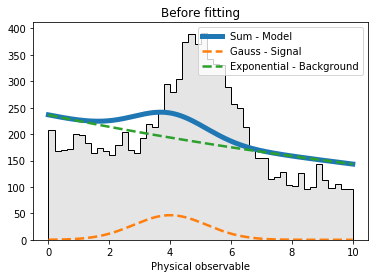

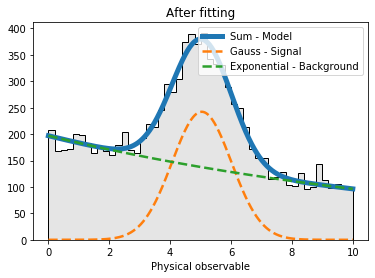

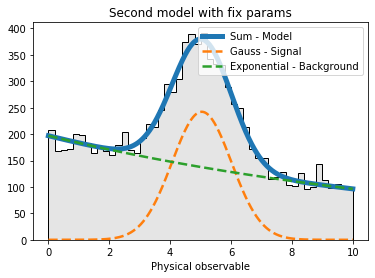

In [1]:
import numpy as np
import zfit
import matplotlib.pyplot as plt

# create space
obs = zfit.Space("x", limits=(-0, 10))

# parameters
mu = zfit.Parameter("mu", 5., 4, 6)
sigma = zfit.Parameter("sigma", 1., 0, 10)
lambd = zfit.Parameter("lambda", -0.06, -1, -0.01)
frac = zfit.Parameter("fraction", 0.3, 0, 1)

mu2 = zfit.Parameter("mu2", 5.)
sigma2 = zfit.Parameter("sigma2", 1.)
lambd2 = zfit.Parameter("lambda2", -0.5)
frac2 = zfit.Parameter("fraction2", 0.1)
gauss2 = zfit.pdf.Gauss(mu=mu2, sigma=sigma2, obs=obs)
exponential2 = zfit.pdf.Exponential(lambd2, obs=obs)
model2 = zfit.pdf.SumPDF([gauss2, exponential2], fracs=frac2)

# model building, pdf creation
gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs)
exponential = zfit.pdf.Exponential(lambd, obs=obs)
model = zfit.pdf.SumPDF([gauss, exponential], fracs=frac)

# data
n_sample = 10000

exp_data = exponential.sample(n=n_sample * (1 - frac)).numpy()

gauss_data = gauss.sample(n=n_sample * frac).numpy()

data = model.create_sampler(n_sample, limits=obs)
data.resample()

mu.set_value(0.5)
sigma.set_value(1.2)
lambd.set_value(-0.05)
frac.set_value(0.07)

# plot the data
data_np = data[:, 0].numpy()
color = 'black'
n_bins = 50

linewidth = 2.5
plot_scaling = n_sample / n_bins * obs.area()

x = np.linspace(0, 10, 1000)

# plot the pdf BEFORE fitting
plt.figure()
plt.title("Before fitting")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")
# plot the pdfs
y = model.pdf(x).numpy()
y_gauss = (gauss.pdf(x) * frac).numpy()  # notice the frac!
y_exp = (exponential.pdf(x) * (1 - frac)).numpy()  # notice the frac!

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

# create NLL
nll = zfit.loss.UnbinnedNLL(model=model, data=data)
nll2 = zfit.loss.UnbinnedNLL(model=model2, data=data)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)
result2 = minimizer.minimize(nll2)
# do the error calculations, here with minos
param_errors = result.error()

param_errors = result2.error()

plt.figure()
plt.title("After fitting")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")

y = model.pdf(x).numpy()  # rerun now after the fitting
y_gauss = (gauss.pdf(x) * frac).numpy()
y_exp = (exponential.pdf(x) * (1 - frac)).numpy()

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

plt.show()

plt.figure()
plt.title("Second model with fix params")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")

y = model2.pdf(x).numpy()  # rerun now after the fitting
y_gauss = (gauss2.pdf(x) * frac2).numpy()
y_exp = (exponential2.pdf(x) * (1 - frac2)).numpy()

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

plt.show()